In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
# resources

# https://www.kaggle.com/laowingkin/mbti-study-personality
# https://www.kaggle.com/archiver/does-what-you-say-define-who-you-are
# https://www.kaggle.com/depture/multiclass-and-multi-output-classification
# https://www.kaggle.com/the1owl/classify-me-again    

In [22]:
train = pd.read_csv('C:/Users/kasina/Dropbox/Python tutorial/MBTI/mbti_1.csv')
train.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [11]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
df.head()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


In [12]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df)

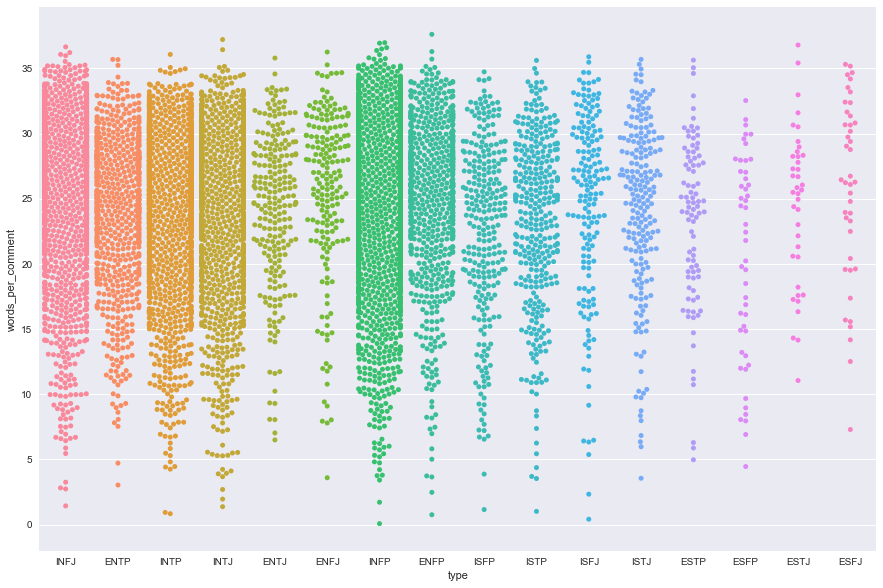

In [13]:
plt.show()

In [15]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'

In [6]:
num_sample = train.shape[0]

count_web = np.zeros(num_sample)
count_youtube = np.zeros(num_sample)
mean_web_i = 0
mean_web_e = 0
count_i = 0
count_e = 0
for n in range(num_sample):
    for i in range(len(train['posts'][n])):
        if train['posts'][n][i:i+4] == "http":
            count_web[n] = count_web[n] + 1
    for i in range(len(train['posts'][n])):
        if train['posts'][n][i:i+7] == "youtube":
            count_youtube[n] = count_youtube[n] + 1
                
#     if train['type'][n][0] == 'I':
#         mean_web_i = mean_web_i + count_web[n]
#         count_i = count_i + 1
#     else:
#         mean_web_e = mean_web_e + count_web[n]
#         count_e = count_e + 1
    
# mean_web_i = mean_web_i/count_i
# mean_web_e = mean_web_e/count_e

In [7]:
web = pd.Series(count_web)
train['count_web'] = web.values

youtube = pd.Series(count_youtube)
train['count_youtube'] = youtube.values

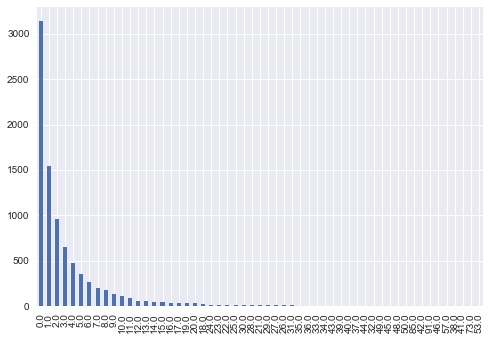

In [8]:
train['count_web'].value_counts().plot(kind = 'bar')
plt.show()

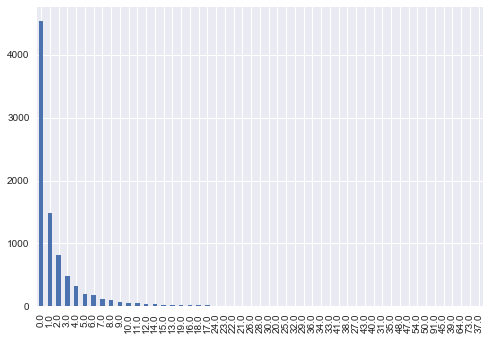

In [9]:
train['count_youtube'].value_counts().plot(kind = 'bar')
plt.show()

In [23]:
train['I_E'] = train.type.str[:1]
train['N_S'] = train.type.str[1:2]
train['T_F'] = train.type.str[2:3]
train['P_J'] = train.type.str[3:4]

In [24]:
train.head()

,type,posts,count_web,count_youtube,I_E,N_S,T_F,P_J
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24.0,16.0,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,10.0,1.0,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,5.0,3.0,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2.0,2.0,I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,6.0,1.0,E,N,T,J


In [32]:
train.groupby(['I_E'])['count_web'].sum()/train.groupby(['I_E'])['count_web'].size()

I_E
E    2.529765
I    3.536399
dtype: float64

In [35]:
train.groupby(['I_E'])['count_youtube'].sum()/train.groupby(['I_E'])['count_youtube'].size()

I_E
E    1.308154
I    2.182445
dtype: float64

In [28]:
train.groupby(['N_S'])['count_web'].sum()/train.groupby(['N_S'])['count_web'].size()

N_S
N    3.250869
S    3.639098
dtype: float64

In [36]:
train.groupby(['N_S'])['count_youtube'].sum()/train.groupby(['N_S'])['count_youtube'].size()

N_S
N    1.941963
S    2.224728
dtype: float64

In [29]:
train.groupby(['T_F'])['count_web'].sum()/train.groupby(['T_F'])['count_web'].size()

T_F
F    3.394333
T    3.198443
dtype: float64

In [37]:
train.groupby(['T_F'])['count_youtube'].sum()/train.groupby(['T_F'])['count_youtube'].size()

T_F
F    2.147209
T    1.784979
dtype: float64

In [30]:
train.groupby(['P_J'])['count_web'].sum()/train.groupby(['P_J'])['count_web'].size()

P_J
J    3.146185
P    3.408128
dtype: float64

In [38]:
train.groupby(['P_J'])['count_youtube'].sum()/train.groupby(['P_J'])['count_youtube'].size()

P_J
J    1.830810
P    2.079374
dtype: float64

In [39]:
train.groupby(['type'])['count_web'].sum()/train.groupby(['type'])['count_web'].size()

type
ENFJ    2.663158
ENFP    2.522963
ENTJ    2.658009
ENTP    2.413139
ESFJ    1.357143
ESFP    2.770833
ESTJ    2.641026
ESTP    3.235955
INFJ    3.293878
INFP    3.771288
INTJ    3.179652
INTP    3.538344
ISFJ    3.530120
ISFP    4.416974
ISTJ    3.058537
ISTP    4.050445
dtype: float64